# Bitácora para analizar archivos ab1
el graficado del electroferograma se tomó de 
http://biopython.org/wiki/ABI_traces

In [58]:
from Bio import SeqIO, SeqRecord, pairwise2
from Bio.Alphabet import IUPAC
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SubsMat.MatrixInfo import blosum62
from collections import defaultdict
import matplotlib.pyplot as plt
from Bio.Align import AlignInfo


In [2]:
ls /Users/migueldelrio/Desktop/data/bioinformatica_aplicada/ab1/

Nav1.2_(B9)-DG7A_E12_010.ab1*   PET2.2_(A2)-DG7A_B10_004.ab1*
Nav1.2_(D10)-RW01_F03_011.ab1*  PET2.2_(C3)-RW01_C01_005.ab1*
Nav1.8_(B11)-DG7A_G12_014.ab1*  PET2.8_(B1)-DG7A_E11_009.ab1*
Nav1.8_(D12)-RW01_H03_015.ab1*  PET2.8_(D2)-RW01_F02_012.ab1*
Nav2.2_(B10)-DG7A_F12_012.ab1*  PETsn1.2_(A3)-DG7A_C10_006.ab1*
Nav2.2_(D11)-RW01_G03_013.ab1*  PETsn1.2_(C4)-RW01_D01_007.ab1*
PET1.2_(A1)-DG7A_A10_002.ab1*   PETsn1.8_(B2)-DG7A_F11_011.ab1*
PET1.2_(C2)-RW01_B01_003.ab1*   PETsn1.8_(D3)-RW01_G02_014.ab1*
PET1.8_(A12)-DG7A_D11_007.ab1*  PHBb1.2_(A8)-DG7A_H10_016.ab1*
PET1.8_(D1)-RW01_E02_010.ab1*   PHBb1.2_(C9)-RW01_A02_002.ab1*


In [3]:
cd /Users/migueldelrio/Desktop/data/bioinformatica_aplicada/ab1/

/Users/migueldelrio/Desktop/data/bioinformatica_aplicada/ab1


## Definición de la función de graficado de los datos del electroferograma

In [4]:
def graficado(x1,x2):
    plt.figure(figsize=(16,4))
    plt.plot(trace['DATA9'], color='blue')
    plt.plot(trace['DATA10'], color='red')
    plt.plot(trace['DATA11'], color='green')
    plt.plot(trace['DATA12'], color='yellow')
    plt.xlim(x1,x2)  # se utiliza valores de 1000 como maximo
    plt.show()

In [5]:
ls

Nav1.2_(B9)-DG7A_E12_010.ab1*   PET2.2_(A2)-DG7A_B10_004.ab1*
Nav1.2_(D10)-RW01_F03_011.ab1*  PET2.2_(C3)-RW01_C01_005.ab1*
Nav1.8_(B11)-DG7A_G12_014.ab1*  PET2.8_(B1)-DG7A_E11_009.ab1*
Nav1.8_(D12)-RW01_H03_015.ab1*  PET2.8_(D2)-RW01_F02_012.ab1*
Nav2.2_(B10)-DG7A_F12_012.ab1*  PETsn1.2_(A3)-DG7A_C10_006.ab1*
Nav2.2_(D11)-RW01_G03_013.ab1*  PETsn1.2_(C4)-RW01_D01_007.ab1*
PET1.2_(A1)-DG7A_A10_002.ab1*   PETsn1.8_(B2)-DG7A_F11_011.ab1*
PET1.2_(C2)-RW01_B01_003.ab1*   PETsn1.8_(D3)-RW01_G02_014.ab1*
PET1.8_(A12)-DG7A_D11_007.ab1*  PHBb1.2_(A8)-DG7A_H10_016.ab1*
PET1.8_(D1)-RW01_E02_010.ab1*   PHBb1.2_(C9)-RW01_A02_002.ab1*


#### Seleccionar un archivo para leerlo
La primera variable `record` tendrá la secuencia original, la segunda `record_trim` la secuencia con la baja calidad eliminada

In [6]:
record = SeqIO.read('Nav1.8_(B11)-DG7A_G12_014.ab1', 'abi')
recordtrimmed = SeqIO.read('Nav1.8_(B11)-DG7A_G12_014.ab1', 'abi-trim')

#### se observan las secuencias obtenidas

In [102]:
print(record.seq, "\n", recordtrimmed.seq, "\n")

print (len(record.seq), len(recordtrimmed.seq), "se eliminaron", 
       len(record.seq)-len(recordtrimmed.seq), "nucleótidos")

NGATTTTGGCTACGACTTCCCCCAATCATCTGTCCCACCTTAGGCGGCTGGCTCCAAAAGGTTACCTCACCGACTTCGGGTGTTACAAACTCTCGTGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGGCATGCTGATCCGCGATTACTAGCGATTCCAACTTCATGTAGGCGAGTTGCAGCCTACAATCCGAACTGAGAACGGTTTTATGGGATTGGCTAAACCTCGCGGTCTTGCTGCCCTTTGTACCGTCCATTGTAGCACGTGTGTAGCCCAAGTCATAAGGGGCATGATGATTTGACGTCATCCCCACCTCCCTCCCGTTA 
 ACTTCCCCCAATCATCTGTCCCACCTTAGGCGGCTGGCTCCAAAAGGTTACCTCACCGACTTCGGGTGTTACAAACTCTCGTGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGGCATGCTGATCCGCGATTACTAGCGATTCCAACTTCATGTAGGCGAGTTGCAGCCTACAATCCGAACTGAGAACGGTTTTATGGGATTGGCTAAACCTCGCGGTCTTGCTGCCCTTTGTACCGTCCATTGTAGCACGTGTGTAGCCCAAGTCATAAGGGGCATGATGATTTGACGTCATCC 

340 309 se eliminaron 31 nucleótidos


## alineamiento de las secuencias para observar en donde se cortaron las secuencias

In [11]:
alignments = pairwise2.align.globalds(record.seq,recordtrimmed.seq, blosum62, -10, -0.5)
print(pairwise2.format_alignment(*alignments[0]))

NGATTTTGGCTACGACTTCCCCCAATCATCTGTCCCACCTTAGGCGGCTGGCTCCAAAAGGTTACCTCACCGACTTCGGGTGTTACAAACTCTCGTGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGGCATGCTGATCCGCGATTACTAGCGATTCCAACTTCATGTAGGCGAGTTGCAGCCTACAATCCGAACTGAGAACGGTTTTATGGGATTGGCTAAACCTCGCGGTCTTGCTGCCCTTTGTACCGTCCATTGTAGCACGTGTGTAGCCCAAGTCATAAGGGGCATGATGATTTGACGTCATCCCCACCTCCCTCCCGTTA
              |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||                 
--------------ACTTCCCCCAATCATCTGTCCCACCTTAGGCGGCTGGCTCCAAAAGGTTACCTCACCGACTTCGGGTGTTACAAACTCTCGTGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGGCATGCTGATCCGCGATTACTAGCGATTCCAACTTCATGTAGGCGAGTTGCAGCCTACAATCCGAACTGAGAACGGTTTTATGGGATTGGCTAAACCTCGCGGTCTTGCTGCCCTTTGTACCGTCCATTGTAGCACGTGTGTAGCCCAAGTCATAAGGGGCATGATGATTTGACGT

## secuencias con el iniciador antisentido (reverse)

In [12]:
record_R = SeqIO.read('Nav1.8_(D12)-RW01_H03_015.ab1', 'abi')
recordtrimmed_R = SeqIO.read('Nav1.8_(D12)-RW01_H03_015.ab1', 'abi-trim')

In [17]:
print(record_R.seq, "\n", recordtrimmed_R.seq, "\n")
print (len(record_R.seq), len(recordtrimmed_R.seq), "se eliminaron", 
       len(record_R.seq)-len(recordtrimmed_R.seq), "nucleótidos")

GGCCACCTTATGACCTGGGCTACACACGTGCTACAATGGACGGTACAAAGGGCAGCAAGACCGCGAGGTTTAGCCAATCCCATAAAACCGTTCTCAGTTCGGATTGTAAGCTGCAACTCGCCTACATGAAGCTGGAATCGCTAGTAATCGCGGATCAGCATGCCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCACGAGAGTTTGTAACACCCGAAGTCGGTGAGGTAACCTTTTGGAGCCAGCCGCCTAAGGTGGGACAGATGATTGGGGTGAAGTCGTAACAAGGTAACCGTATCGGAAGGTGCGGTTAGATCACCTCCTAA 
 GCTACACACGTGCTACAATGGACGGTACAAAGGGCAGCAAGACCGCGAGGTTTAGCCAATCCCATAAAACCGTTCTCAGTTCGGATTGTAAGCTGCAACTCGCCTACATGAAGCTGGAATCGCTAGTAATCGCGGATCAGCATGCCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCACGAGAGTTTGTAACACCCGAAGTCGGTGAGGTAACCTTTTGGAGCCAGCCGCCTAAGGTGGGACAGATGATTGGGGTGAAGTCGTAACAAGGTAACCGTATCGGAAGGTGC 

339 303 se eliminaron 36 nucleótidos


## para guardar las secuencias en archivos separados

In [48]:
SeqIO.write(recordtrimmed, "../fasta/Nav1_2F.fa", "fasta")
SeqIO.write(recordtrimmed_R, "../fasta/Nav1_2R.fa", "fasta")

1

In [51]:
ls ../fasta/Nav1_*

../fasta/Nav1_2F.fa  ../fasta/Nav1_2R.fa


# Obtención de la secuencia consenso

### Primeramente se alinean las secuencias recortadas

In [64]:
alignments = pairwise2.align.globalds(recordtrimmed.seq,recordtrimmed_R.seq.reverse_complement(), blosum62, -10, -0.5)

### Este procedimiento puede generar más de una secuencias, por lo que es conveniente revisar el
### número de alineamientos

In [90]:
len(alignments)

2

### Se grafican los alineamientos

In [91]:
for row in range(len(alignments)):
    print ("Alineamiento", row)
    print(pairwise2.format_alignment(*alignments[row]), "\n")
    

Alineamiento 0
-----------------------------ACTTC-CCCCAATCATCTGTCCCACCTTAGGCGGCTGGCTCCAAAAGGTTACCTCACCGACTTCGGGTGTTACAAACTCTCGTGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGGCATGCTGATCCGCGATTACTAGCGATTCCAACTTCATGTAGGCGAGTTGCAGCCTACAATCCGAACTGAGAACGGTTTTATGGGATTGGCTAAACCTCGCGGTCTTGCTGCCCTTTGTACCGTCCATTGTAGCACGTGTGTAGCCCAAGTCATAAGGGGCATGATGATTTGACGTCATCC
                             ||||| ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.||||||||||||||||||||||.|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||                                    |
GCACCTTCCGATACGGTTACCTTGTTACGACTTCACCCCAATCATCTGTCCCACCTTAGGCGGCTGGCTCCAAAAGGTTACCTCACCGACTTCGGGTGTTACAAACTCTCGTGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGGCATGCTGATCCGCGATTACTAGCGATTCCAGCTTCATGTAGGCGAGTTGCAGCTTACAATCCGAACTGAGAACGGTTTTATGGGATTGGCTAAACCTCGCGGTCTTGCTGCCCTTTGTACCGTCCATTGTAGCACGTGTGTAG---

### Se verifica cuál es el más adecuado y se selecciona una secuencia consenso

## La obtención de la secuencia consenso se hace a mano. Seleccione el área en donde tenga al menos dos nucleótidos y péguelos en la siguiente variable `secuencia`

In [87]:
secuencia = "ACTTCACCCCAATCATCTGTCCCACCTTAGGCGGCTGGCTCCAAAAGGTTACCTCACCGACTTCGGGTGTTACAAACTCTCGTGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGGCATGCTGATCCGCGATTACTAGCGATTCCAGCTTCATGTAGGCGAGTTGCAGCTTACAATCCGAACTGAGAACGGTTTTATGGGATTGGCTAAACCTCGCGGTCTTGCTGCCCTTTGTACCGTCCATTGTAGCACGTGTGTAGC"


### Se puede camibar el nombre y la descripcion de la secuencia o cambiarlo por el texto deseado

In [88]:
nombreid = record.id
nombredes = record.id

### Para guardar la secuencia consenso, primero se reconstruye y después se verifica

In [92]:
consenso = SeqRecord(Seq(secuencia), id=nombreid, description=nombredes)
print (consenso.id, consenso.description, consenso.seq[:30])

Nav1.8_(B11)-DG7A Nav1.8_(B11)-DG7A ACTTCACCCCAATCATCTGTCCCACCTTAG


In [93]:
SeqIO.write(consenso, "../fasta/Nav1_2.fa", "fasta")


1

In [94]:
ls ../fasta/Nav1_*

../fasta/Nav1_2.fa   ../fasta/Nav1_2F.fa  ../fasta/Nav1_2R.fa


# _Blast_ de la secuencia

In [97]:
cd ../fasta/

/Users/migueldelrio/Desktop/data/bioinformatica_aplicada/fasta


In [98]:
ls Nav1_*

Nav1_2.fa   Nav1_2F.fa  Nav1_2R.fa


In [99]:
%%bash
export BLASTDB=~/Desktop/bigdata/16SMicrobial/
date  
blastn -query Nav1_2.fa \
-db ~/Desktop/bigdata/16SMicrobial/16SMicrobial \
-out Nav1_2.tab -evalue 1E-6 -max_target_seqs 1 \
-num_threads 2 -outfmt "6 std sskingdoms stitle staxids sscinames scomnames sblastnames" 
date

Wed Jan 30 11:32:06 CST 2019
Wed Jan 30 11:32:06 CST 2019


In [100]:
!head Nav1_2.tab

Nav1.8_(B11)-DG7A	NR_025241.1	99.635	274	1	0	1	274	1478	1205	7.61e-142	501	Bacteria	Bacillus aquimaris strain TF-12 16S ribosomal RNA gene, partial sequence	189382	Bacillus aquimaris	Bacillus aquimaris	firmicutes


## graficado del electroferograma

In [103]:
record.annotations.keys()
record.annotations['abif_raw'].keys()
channels = ['DATA9', 'DATA10', 'DATA11', 'DATA12']
trace = defaultdict(list)

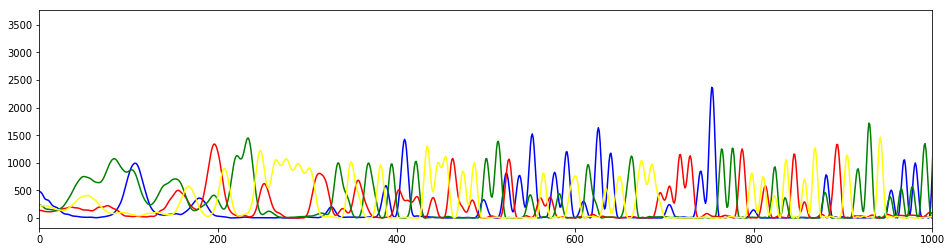

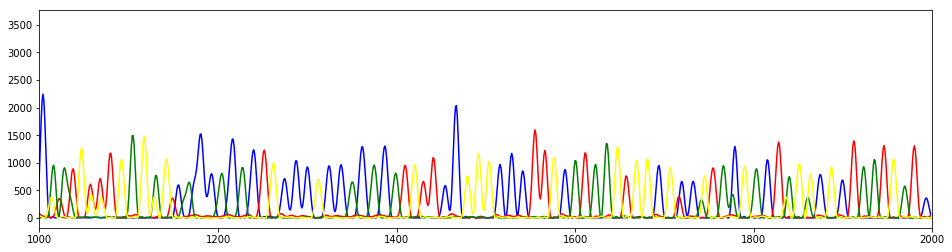

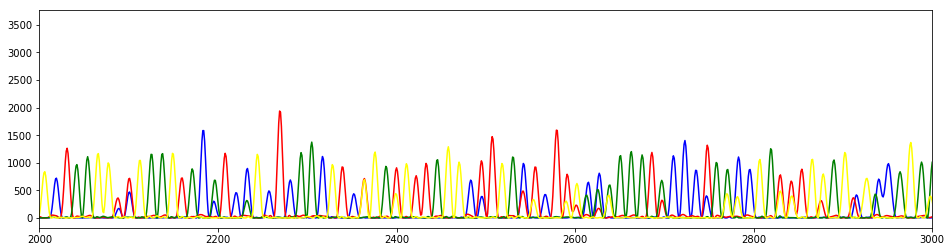

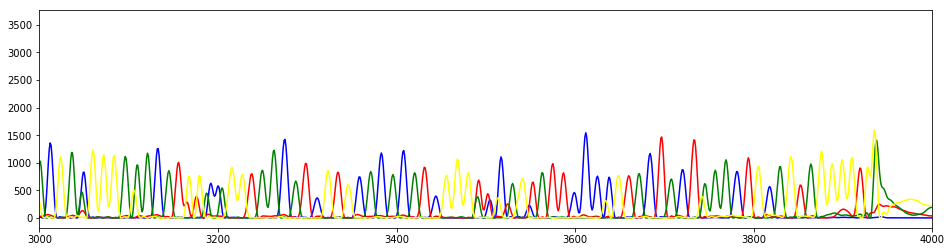

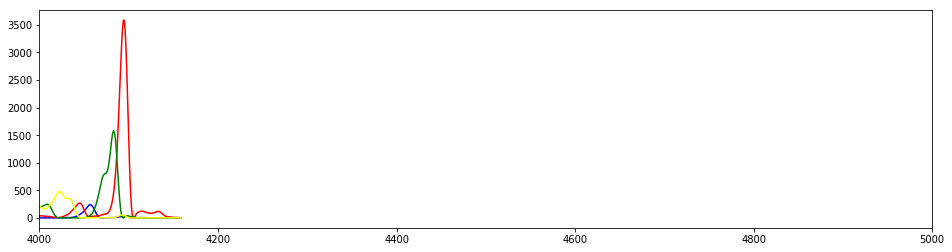

In [104]:
for c in channels:
    trace[c] = record.annotations['abif_raw'][c]

intervalos = range(1000,len(trace['DATA9'])+1000,1000)
for intervalo in intervalos:
    graficado (intervalo-1000,intervalo)

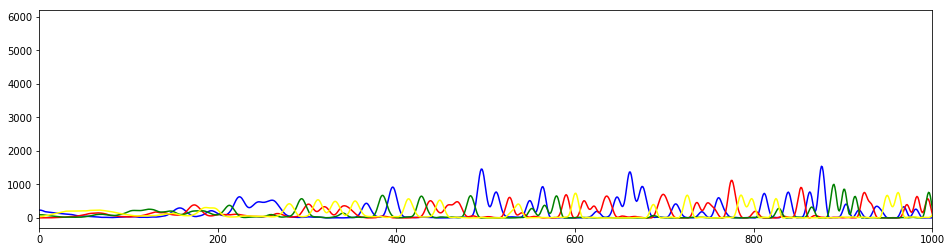

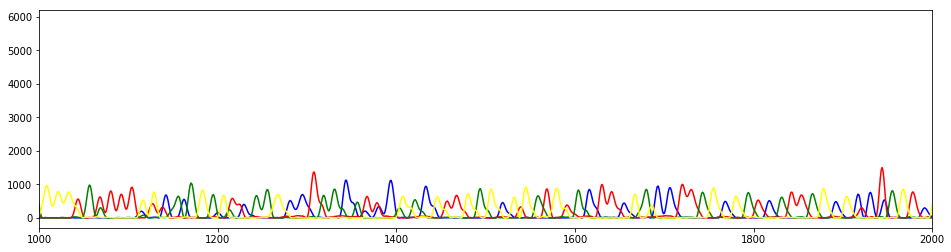

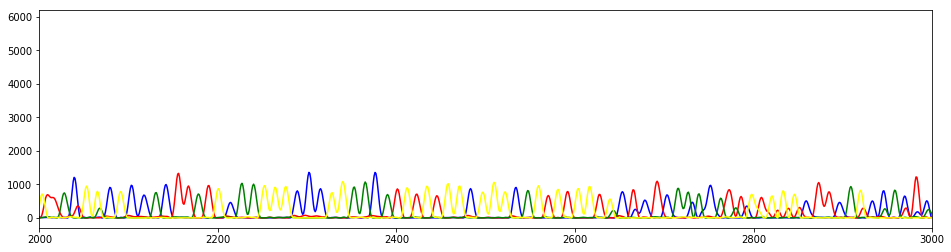

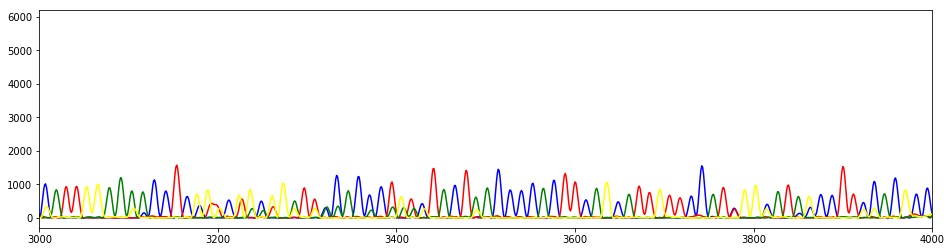

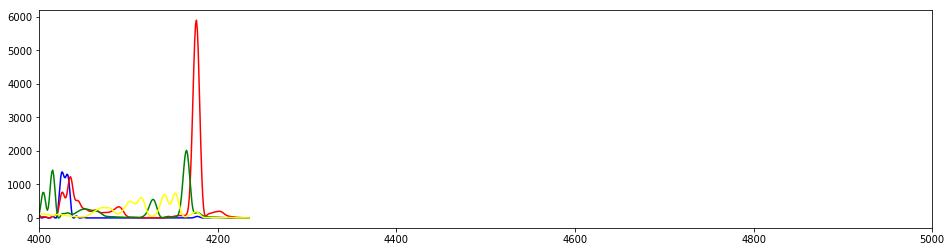

In [105]:
for c in channels:
    trace[c] = record_R.annotations['abif_raw'][c]

intervalos = range(1000,len(trace['DATA9'])+1000,1000)
for intervalo in intervalos:
    graficado (intervalo-1000,intervalo)

# En caso de tener varios archivos a procesar se puede usar el siguiente procedimiento

### se utilizan los comandos del sistema operativo para leer archivos de directorios

In [113]:
cd /Users/migueldelrio/Desktop/bioinformatica2019/data/ab2/

/Users/migueldelrio/Desktop/bioinformatica2019/data/ab2


In [114]:
import os#, sys

In [115]:
pwd

'/Users/migueldelrio/Desktop/bioinformatica2019/data/ab2'

In [117]:
lista = os.listdir(path ="/Users/migueldelrio/Desktop/bioinformatica2019/data/ab2")
lista

['PET1.8F.ab1',
 '.DS_Store',
 'PHBb1.2F.ab1',
 'PET1.2F.ab1',
 'Nav2.2F.ab1',
 'PETsn1.2F.ab1',
 'Nav1.8F.ab1',
 'PET2.8F.ab1',
 'PETsn1.8F.ab1',
 'Nav1.2F.ab1',
 'PET2.2F.ab1']

### Se verifican los archivos a procesar

In [120]:
n=0
for row in lista:
    if row[:1]!="." and row[-3:]=="ab1":
        n+=1
        print (row)
print (n, "archivos")


PET1.8F.ab1
PHBb1.2F.ab1
PET1.2F.ab1
Nav2.2F.ab1
PETsn1.2F.ab1
Nav1.8F.ab1
PET2.8F.ab1
PETsn1.8F.ab1
Nav1.2F.ab1
PET2.2F.ab1
10 archivos


### para guardar los archivos de manera individual con extensión fasta

In [ ]:
n=0
for row in lista:
    if row[:1]!=".":
        n+=1
        print (row, end ="\t")
        rec1= Trace(row,  trimming=True)
        secuencia = SeqRecord(Seq((rec1.seq)), id=rec1.id, description=rec1.id)
        archivo= "../fasta/"+ row[:-4] +".fasta"
        print (archivo)
        SeqIO.write(secuencia, archivo, "fasta")
print (n, "archivos")



### para guardar todos los archivos en un solo archivo fasta

In [ ]:
secuencias= []
n=0
for row in lista:
    if row[:1]!=".":
        n+=1
        print (row)
        rec1= Trace(row,  trimming=True)
        secuencia = SeqRecord(Seq(rec1.seq,
           IUPAC.unambiguous_dna), id=rec1.id, description=rec1.id)
        secuencias.append(secuencia)
archivo= "../fasta/secuencias.fasta"
print (archivo)
SeqIO.write(secuencias, archivo, "fasta")
print (n, "archivos")


## corrobore el archivo secuencias.fasta

## de qué manera podría cambiarle los nombres de descripción a las secuencias?

## utilice el Mega y compare sus resultados

## guarde el archivo en formato del GenBank

In [ ]:
SeqIO.write(secuencias, "../genbank/secuencias.gb", "genbank")


### revise el archivo ../genbank/secuencias.gb, explique qué observa

In [ ]:
!head -5 ../genbank/secuencias.gb